In [6]:
!gdown --id 13yYiAdON8qW3L_5LMa0QcWWgKwax7xJ3

import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import NoNorm
import math
from sklearn import datasets, linear_model
import numpy as np 

def Linear_Regression(grid):
    grid = np.array(grid)
    y = grid[:,-1]
    y = np.array([y]).T
    X = grid[:,:-1]
    # Building Xbar 
    one = np.ones((X.shape[0], 1))
    Xbar = np.concatenate((one, X), axis = 1)
    regr = linear_model.LinearRegression(fit_intercept=True) # fit_intercept = False for calculating the bias
    regr.fit(Xbar, y)
    return regr.coef_[0]

def geometric_transform(image, matrix_start, matrix_end, H, W):
  grid = []
  for i in range(len(matrix_end)):
    grid.append([matrix_start[i,0], matrix_start[i,1],1,0,0,0,-1*matrix_start[i,0]*matrix_end[i,0],-1*matrix_end[i,0]*matrix_start[i,1],matrix_end[i,0]])
    grid.append([0,0,0,matrix_start[i,0], matrix_start[i,1],1,-1*matrix_start[i,0]*matrix_end[i,1],-1*matrix_start[i,1]*matrix_end[i,1],matrix_end[i,1]])
  height, width = image.shape
  grid = np.array(grid)

  # predict = Linear_Regression(grid)
  # predict[3] = -1090.518755109
  # predict[6] = -1672.009972861
  # predict = np.append(predict[1:],1)
  # predict = predict.reshape(3,3)

  predict = np.dot(np.linalg.pinv(grid[:,:-1]), grid[:,-1].T)
  predict = np.append(predict,1)
  predict = predict.reshape(3,3)

  P_ = np.array([[x, y, 1] for y in range(H) for x in range(W)])
  M_ = np.linalg.pinv(predict)
  P = np.dot(M_, P_.T)
  P = P.T

  def my_round(x, max):
    x = int(x)
    if x < 0:
      return 0
    elif x > max:
      return max
    return x

  P = np.array([[my_round(x[1]/x[2], height - 1), my_round(x[0]/x[2], width - 1)] for x in P])

  img = np.zeros((H,W))

  for i in range(len(P)):
    p = P[i]
    p_ = P_[i]
    img[p_[1],p_[0]] = image[p[0],p[1]]

  return np.array(img, dtype='int16')

def display_multiple_img(images, rows = 1, cols=1, size = (15,8)):
    figure, ax = plt.subplots(nrows=rows,ncols=cols, figsize=size)
    for ind,title in enumerate(images):
        ax.ravel()[ind].imshow(images[title], cmap='gray',norm=NoNorm())
        ax.ravel()[ind].set_title(title)
        ax.ravel()[ind].set_axis_off()
    plt.tight_layout()
    plt.show()

Downloading...
From: https://drive.google.com/uc?id=13yYiAdON8qW3L_5LMa0QcWWgKwax7xJ3
To: /content/IMG_1473.jpg
3.27MB [00:00, 105MB/s]


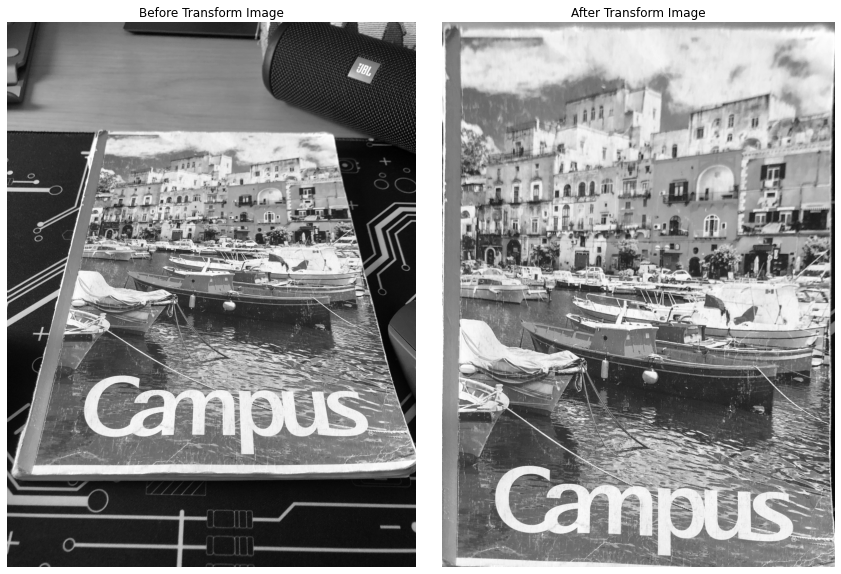

In [7]:
# Show image
filename = './IMG_1473.jpg'
image = cv2.imread(filename, 0)
# plt.figure(figsize=(12, 8))
# plt.imshow(image, cmap='gray',norm=NoNorm())
# plt.title('Before Transform Image')
# plt.axis('off')
# plt.show()
height, width = image.shape

matrix_start = np.array([[round(2/9*width),round(2.35/12*height)],[round(7.15/9*width),round(2.4/12*height)],[round(0.2/9*width),round(10/12*height)],[round(9/9*width - 1),round(9.62/12*height)]])
matrix_end = np.array([[0,0], [1799,0], [0,2499], [1799,2499]])
img = geometric_transform(image, matrix_start, matrix_end, 2500, 1800)
# Show image
# plt.figure(figsize=(12, 8))
# plt.imshow(img, cmap='gray',norm=NoNorm())
# plt.title('After Transform Image')
# plt.axis('off')
# plt.show()

images = {'Before Transform Image': image, 'After Transform Image': img}
display_multiple_img(images, 1, 2, (12,8))

Downloading...
From: https://drive.google.com/uc?id=1a3OU-JrN4rseni-akiHJFZ1e9EN-_DE8
To: /content/IMG_1474.jpg
3.22MB [00:00, 101MB/s]


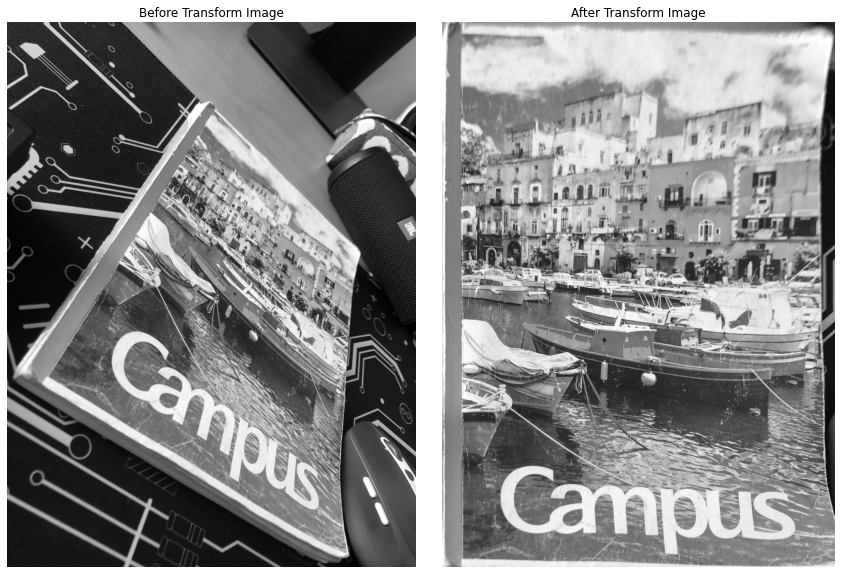

In [8]:
!gdown --id 1a3OU-JrN4rseni-akiHJFZ1e9EN-_DE8

# Show image
filename = './IMG_1474.jpg'
image = cv2.imread(filename, 0)
height, width = image.shape

matrix_start = np.array([[round(4.4/9*width),round(1.7/12*height)],[round(7.8/9*width),round(5/12*height)],[round(0.3/9*width),round(7.7/12*height)],[round(7.3/9*width - 1),round(11.7/12*height)]])
matrix_end = np.array([[0,0], [1799,0], [0,2499], [1799,2499]])
img = geometric_transform(image, matrix_start, matrix_end, 2500, 1800)
# Show image

images = {'Before Transform Image': image, 'After Transform Image': img}
display_multiple_img(images, 1, 2, (12,8))